##Campo eléctrico de un capacitor de placas paralelas

El capacitor o condensador es un dispositivo electrónico pasivo capaz de almacenar energía potencial eléctrica (Carga eléctrica) para después ser liberada rápidamente. El almacenamiento de energía se da al trasferir carga desde un conductor al otro, de modo que tengan la misma magnitud de carga y cargas de signo opuesto. Algunas de las aplicaciones prácticas de los capacitores son: el flash fotográfico, láseres, receptores de radio y de televisión.

In [74]:
#librerias
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

Campo eléctrico en la posición (x , y) para una carga puntual q ubicada en r0
$$E_x = \frac{q \cdot (x - x_0)}{\text{d}^3}$$

$$E_y = \frac{q \cdot (y - y_0)}{\text{d}^3}$$

In [75]:
#campo electrico
def E(q, r0, x, y):
    dist = np.sqrt((x - r0[0]) ** 2 + (y - r0[1]) ** 2) ** 3
    return q * (x - r0[0]) / dist, q * (y - r0[1]) / dist


In [76]:
#malla donde estará el campo
nx, ny = 72, 72
x = np.linspace(-4, 4, nx)
y = np.linspace(-4, 4, ny)
X, Y = np.meshgrid(x, y)

In [77]:
d = 2 # distancia de las placas 0<x<2
N = 15 #numero de cargas

q_positvas = [(1, (i / (N-1) * 2 - 1, -d / 2)) for i in range(N)]
q_negativas =  [(-1, (i / (N-1) * 2 - 1, d / 2)) for i in range(N)]
cargas = q_positvas + q_negativas

In [78]:
#contribuscón de cada carga al campo eléctrico
Ex, Ey = np.zeros((ny, nx)), np.zeros((ny, nx))

for q, pos in cargas:
    ex, ey = E(q, pos, x=X, y=Y)
    Ex += ex
    Ey += ey


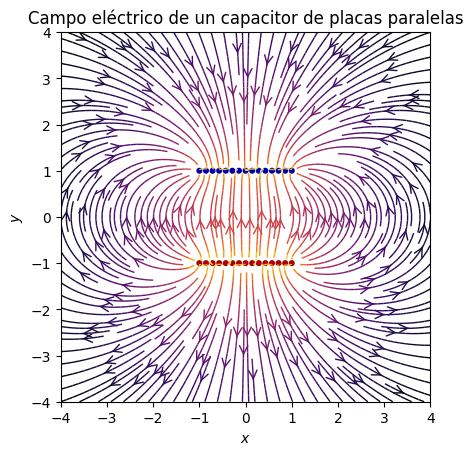

In [83]:
#graficación en el plano

fig, ax = plt.subplots()
color = 2 * np.log(np.sqrt(Ex**2 + Ey**2))
ax.streamplot(x, y, Ex, Ey, color=color, linewidth=1, cmap=plt.cm.inferno, density=2, arrowstyle='->', arrowsize=1.5)

#se definen los colores de las cargas
q_color = {True: '#aa0000', False: '#0000aa'}
for q, pos in cargas:
    ax.add_artist(Circle(pos, 0.05, color=q_color[q > 0]))

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('Campo eléctrico de un capacitor de placas paralelas')
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.set_aspect('equal')

plt.show()

Puedo afirmar que el gráfico está correcto ya que se tiene lo que se podría esperar para el campo electrio de un capacitor de placas paralelas y es que las lineas de campo salen de las cargas positivas (rojas) y van hacia las negativas (azules)